In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [2]:
airline = pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [4]:
airline.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
airline = airline.drop(['ID#'], axis=1)

In [6]:
scaler = StandardScaler()
xs = scaler.fit_transform(airline)
xs

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [7]:
x_norm = normalize(xs)
x_norm = pd.DataFrame(x_norm ,columns=airline.columns )
x_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.195382,-0.080683,-0.333293,-0.042547,-0.027183,-0.304366,-0.478154,-0.142313,-0.156850,0.604351,-0.332141
1,-0.237609,-0.082057,-0.338968,-0.043272,-0.027646,-0.308801,-0.440426,-0.144736,-0.159520,0.607814,-0.337796
2,-0.151179,-0.088005,-0.363539,-0.046408,-0.029650,-0.254736,-0.373965,-0.155228,-0.171083,0.666973,-0.362283
3,-0.251560,-0.080276,-0.331613,-0.042333,-0.027046,-0.297015,-0.475744,-0.141596,-0.156059,0.591287,-0.330467
4,0.072637,-0.056460,0.427157,-0.029773,-0.019022,0.328253,0.454409,0.350016,0.209867,0.413369,0.395168
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.240653,-0.081951,-0.338528,-0.043215,-0.027610,-0.157022,-0.348237,-0.081709,-0.043330,-0.578505,0.573578
3995,-0.039924,-0.081317,-0.335912,-0.042881,-0.027397,-0.292171,-0.300091,-0.143432,-0.158082,-0.575726,0.569145
3996,-0.000020,-0.088374,0.324049,-0.046602,-0.029774,0.163088,-0.177932,-0.155878,-0.171800,-0.624076,0.618533
3997,-0.085616,-0.085935,-0.354986,-0.045316,-0.028953,-0.317949,-0.509275,0.013161,-0.045437,-0.607076,-0.353759


In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

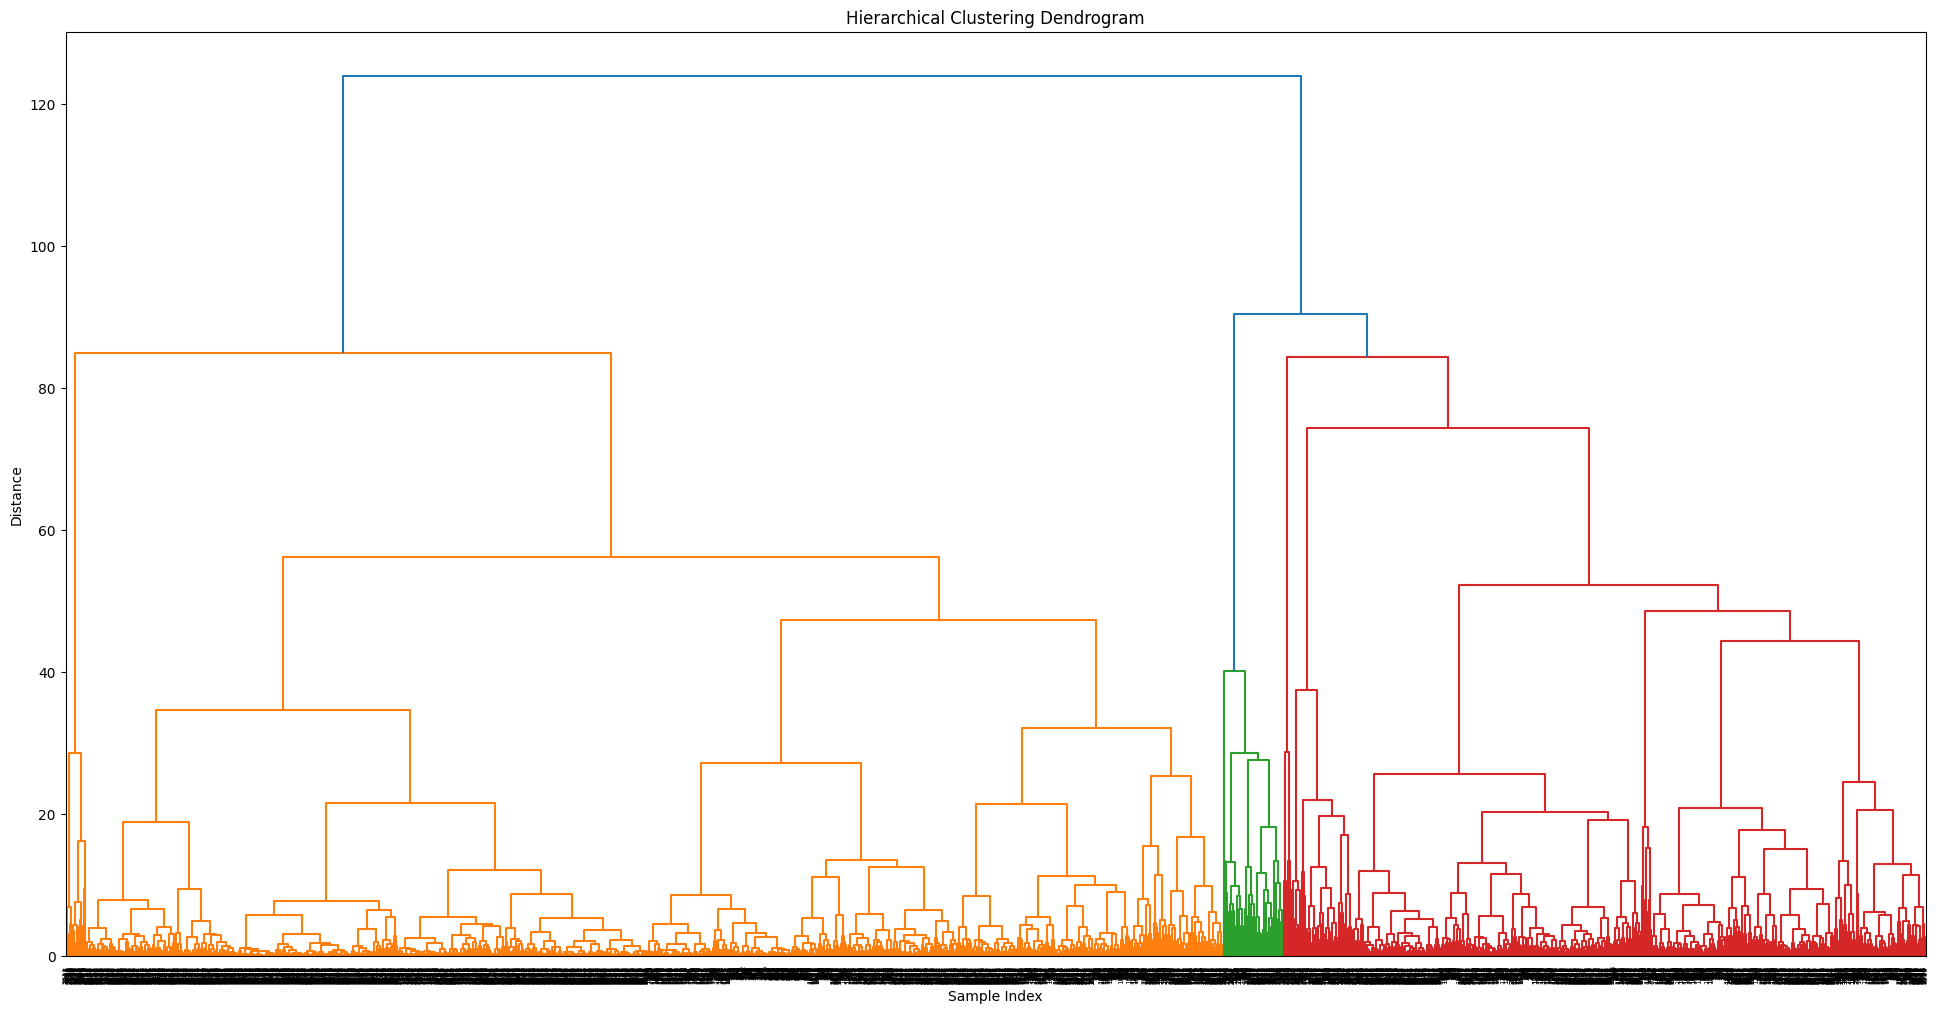

In [9]:
z = linkage(xs, method='ward') 
plt.figure(figsize=(24,12))
dendrogram(z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [10]:
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [11]:
y=pd.DataFrame(hclusters.fit_predict(airline),columns=['clustersid'])
y['clustersid'].value_counts()

1    3215
0     758
2      26
Name: clustersid, dtype: int64

In [12]:
airline['clustersid']=hclusters.labels_
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [13]:
airline.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,193289.238786,302.564644,3.039578,1.010554,1.050132,37696.493404,17.581794,980.391821,2.907652,5070.874670,0.522427
1,1,39176.370140,103.776050,1.818040,1.015552,1.002488,12010.327527,10.105132,326.557698,0.969207,3875.199689,0.330638
2,2,841016.769231,512.692308,3.346154,1.000000,1.115385,52888.269231,22.346154,1797.807692,6.653846,6447.269231,0.846154


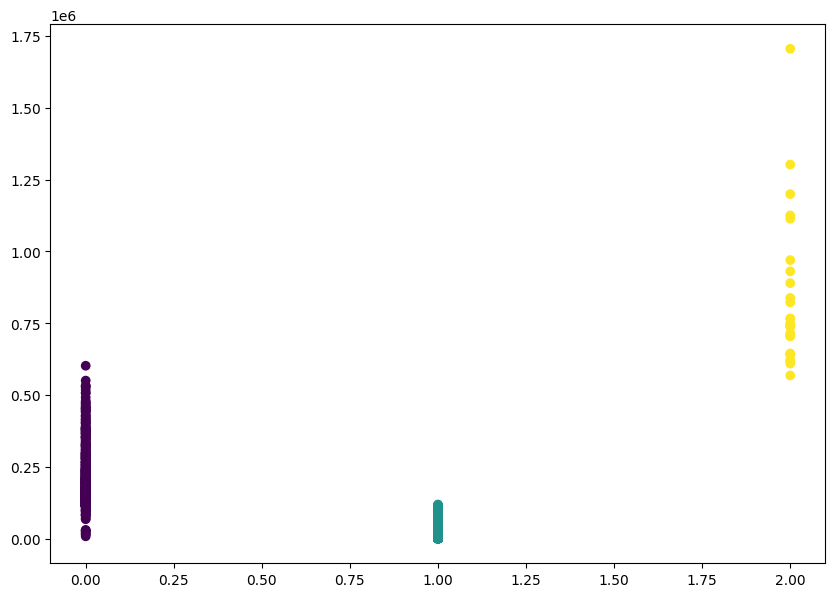

In [14]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline['clustersid'],airline['Balance'], c=hclusters.labels_) 